# Random Forest Classifier x Toxic Content Detection
Il presente Notebook mostra l'addestramento ed il testing di un Classificatore basato su Random Forest per il task di Toxic Content Detection.

I dati sono stati processati come segue:
1. Pulizia del testo (si veda, 'dataset_preprocessing.py')
2. Lemmatizzazione con NLTK
3. Vettorizzazione con TF-IDF

In [1]:
import pandas as pd
import pickle
import nltk
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

All'interno del Notebook saranno addestrati due Classificatori RandomForest con 1000 Alberi, uno sul Dataset "non-Lemmatizzato" e l'altro sul Dataset "Lemmatizzato".

# RandomForest_1000, Dataset "non-Lemmatizzato"

## Addestramento

In [2]:
training_set = pd.read_csv("./../../datasets/training_set.csv")
print("Numero di Frasi nel Training Set:", len(training_set))
print("Numero Frasi 'toxic' nel Training Set:", len(training_set[training_set['toxic'] == 1]))
print("Numero Frasi 'not-toxic' nel Training Set:", len(training_set[training_set['toxic'] == 0]))

Numero di Frasi nel Training Set: 15282
Numero Frasi 'toxic' nel Training Set: 3058
Numero Frasi 'not-toxic' nel Training Set: 12224


In [3]:
y_train = training_set['toxic']

In [4]:
# Vettorizzazione con TF-IDF
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(training_set['comment_text'])
print("X_train.shape: " + str(X_train.shape))

X_train.shape: (15282, 39767)


In [5]:
cl = RandomForestClassifier(n_estimators=1000, random_state=24, verbose=1)
model_filename = "rf_classifier_1000.pkl"

In [ ]:
# Addestramento sul Dataset non-lemmatizzato
print("Training di RF_1000 sul Dataset 'non-Lemmatizzato'...")
start = datetime.now()
cl.fit(X=X_train, y=y_train)
end = datetime.now()
print("Training completato! Tempo impiegato: " + str(end-start))

with open(model_filename, 'wb') as f:
    pickle.dump(cl, f)

In [6]:
# Caricamento del Modello pre-addestrato
with open(model_filename, 'rb') as f:
    cl = pickle.load(f)

## Testing

In [7]:
test_data = pd.read_csv("./../../datasets/test_set.csv")
test_data.dropna(inplace=True)

test_set = test_data[test_data['toxic'] != -1]
exp_set = test_data[test_data['toxic'] == -1]

print("Numero di Frasi nel Test Set:", len(test_set))
print("Numero Frasi 'toxic' nel Test Set:", len(test_set[test_set['toxic'] == 1]))
print("Numero Frasi 'not-toxic' nel Test Set:", len(test_set[test_set['toxic'] == 0]))

Numero di Frasi nel Test Set: 63842
Numero Frasi 'toxic' nel Test Set: 6087
Numero Frasi 'not-toxic' nel Test Set: 57755


In [8]:
y_test = test_set['toxic']

In [9]:
X_test = vectorizer.transform(test_set['comment_text'])
print("X_test.shape: " + str(X_test.shape))

X_test.shape: (63842, 39767)


In [10]:
y_pred = cl.predict(X_test)
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Precision: " + str(precision_score(y_test, y_pred)))
print("Recall: " + str(recall_score(y_test, y_pred)))
print("F-Measure: " + str(f1_score(y_test, y_pred)))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.3s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.5s


Accuracy: 0.9002224241095204
Precision: 0.4776284584980237
Recall: 0.49630359783144407
F-Measure: 0.4867869803416049


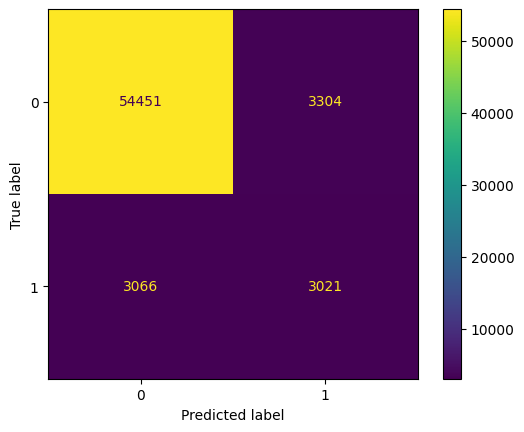

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cl.classes_)
disp.plot()
plt.show()

In [12]:
y_score = cl.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_score))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   14.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   25.2s


ROC-AUC Score: 0.907260665577533


# RandomForest_1000, Dataset "Lemmatizzato"

## Addestramento

In [13]:
training_set_lem = pd.read_csv("./../../datasets/training_set_lemmatized.csv")

In [14]:
# Vettorizzazione con TF-IDF
vectorizer_lem = TfidfVectorizer()

X_train_lem = vectorizer_lem.fit_transform(training_set_lem['comment_text'])
print("X_train_lem.shape: " + str(X_train_lem.shape))

X_train_lem.shape: (15282, 34238)


In [15]:
cl_lem = RandomForestClassifier(n_estimators=1000, random_state=24, verbose=1)
model_filename = "rf_classifier_1000_lem.pkl"

In [ ]:
# Addestramento sul Dataset lemmatizzato
print("Training di RF_1000 sul Dataset 'Lemmatizzato'...")
start = datetime.now()
cl_lem.fit(X=X_train_lem, y=y_train)
end = datetime.now()
print("Training completato! Tempo impiegato: " + str(end-start))

with open(model_filename, 'wb') as f:
    pickle.dump(cl_lem, f)

In [16]:
# Caricamento del Modello pre-addestrato
with open(model_filename, 'rb') as f:
    cl_lem = pickle.load(f)

## Testing

In [17]:
test_data_lem = pd.read_csv("./../../datasets/test_set_lemmatized.csv")
test_data_lem.dropna(inplace=True)

test_set_lem = test_data_lem[test_data_lem['toxic'] != -1]
exp_set_lem = test_data_lem[test_data_lem['toxic'] == -1]

In [18]:
X_test_lem = vectorizer_lem.transform(test_set_lem['comment_text'])
print("X_test_lem.shape: " + str(X_test_lem.shape))

X_test_lem.shape: (63842, 34238)


In [19]:
y_pred_lem = cl_lem.predict(X_test_lem)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_lem)))
print("Precision: " + str(precision_score(y_test, y_pred_lem)))
print("Recall: " + str(recall_score(y_test, y_pred_lem)))
print("F-Measure: " + str(f1_score(y_test, y_pred_lem)))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   13.2s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   23.5s


Accuracy: 0.9022430374988252
Precision: 0.48802115743621655
Recall: 0.5153606045671102
F-Measure: 0.5013184178985218


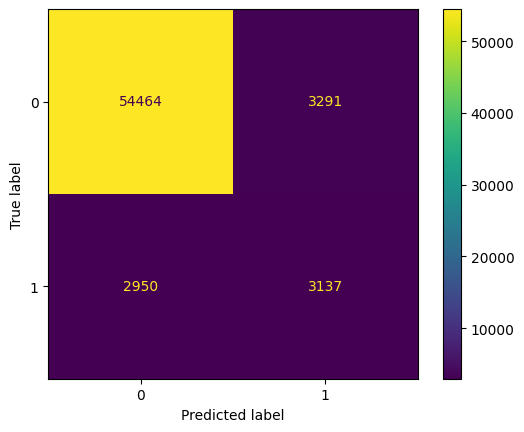

In [20]:
cm = confusion_matrix(y_test, y_pred_lem, labels=cl_lem.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cl_lem.classes_)
disp.plot()
plt.show()

In [21]:
y_score_lem = cl_lem.predict_proba(X_test_lem)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_score_lem))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:   13.1s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:   23.5s


ROC-AUC Score: 0.9127451082041476
